In [1]:
from importlib import reload
import sys
import pickle
import numpy as np 
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.ioff()
%matplotlib inline
import seaborn as sns
import pandas as pd
import itertools
from tqdm import tqdm
import time

import get_hic_map_of_MEFISTO_loci as MEFISTO

In [27]:
# Reload modules in case of modifications
reload(MEFISTO)

<module 'get_hic_map_of_MEFISTO_loci' from '/home/braunger/masterthesis/code/MEFISTO/get_hic_map_of_MEFISTO_loci.py'>

## Load interchromosomal Hi-C data

In [3]:
hic_dir = '/home/braunger/masterthesis/save/processed_hic_data/'
data_dir = '/home/braunger/masterthesis/data/'
save_dir = '/home/braunger/masterthesis/save/figures/MEFISTO/'
resol = 250000

In [38]:
inter_IMR90 = pd.read_csv(hic_dir+'processed_hic_data_IMR90/final_BP250000_intraKR_interINTERKR/all_inter_long.csv')
inter_old_fibroblasts = pd.read_csv(hic_dir+'processed_hic_data_old_fibroblasts/final_BP250000_intraKR_interINTERKR/all_inter_long.csv')
                   

In [5]:
# Normalize Hi-C Data
q = 0.9
q_IMR90 = np.quantile(inter_IMR90['value'], q)
q_old_fibroblasts = np.quantile(inter_old_fibroblasts['value'], q)

inter_IMR90['value_norm'] = inter_IMR90['value'].div(q_IMR90)
inter_old_fibroblasts['value_norm'] = inter_old_fibroblasts['value'].div(q_old_fibroblasts)

# Histogram of the Hi-C values of MEFISTO genes with highest weight

Function to load dataframe containing the top "percentage" genes with highest positive or negative weight 
in factor 1 of a MEFISTO model with 3 factors trained on the Fleischer et al.
RNA-seq data binning the individuals in 10 years intervals and plot the histogram

In [6]:
def plot_hist(percentage, binwidth):
    
    # filter hic data to genes with highest weights in the first factor of MEFISTO
    IMR90_pos_weights, IMR90_neg_weights, old_fibroblasts_pos_weights, old_fibroblasts_neg_weights = subset_data(percentage)
    
    # Plot histograms
    plt.figure(figsize = (12,5))
    # IMR90
    plt.subplot(1, 2, 1)
    plot_subplots(IMR90_pos_weights, IMR90_neg_weights, binwidth, "IMR90")
    # Old fibroblasts
    plt.subplot(1, 2, 2)
    plot_subplots(old_fibroblasts_pos_weights, old_fibroblasts_neg_weights, binwidth, "Old fibroblasts")
    
    
def plot_subplots(df1, df2, binwidth, celltype):
    plt.hist(df1['value_norm'], 
             bins=np.arange(min(df1['value_norm']), max(df1['value_norm']) + binwidth, binwidth), 
             alpha=0.5, label="positive weights")
    plt.hist(df2['value_norm'], 
             bins=np.arange(min(df2['value_norm']), max(df2['value_norm']) + binwidth, binwidth), 
             alpha=0.5, label="negative weights")
    plt.xlabel("Normalized Hi-C values")
    plt.ylabel("Counts")
    plt.legend(loc='upper right')
    plt.title(celltype)
    
    
def subset_data(percentage):
    # get df with the top weighted genes from MEFISTO
    pos_weights = pd.read_csv(data_dir+'MOFA/top_genes_pos_'+str(percentage)+'.csv')
    neg_weights = pd.read_csv(data_dir+'MOFA/top_genes_neg_'+str(percentage)+'.csv')
    
    # filter Hi-C data to the MEFISTO loci
    # IMR90
    IMR90_pos_weights = inter_IMR90[inter_IMR90['chr1'].isin(pos_weights['locus']) & 
                                 inter_IMR90['chr2'].isin(pos_weights['locus'])]
    IMR90_neg_weights = inter_IMR90[inter_IMR90['chr1'].isin(neg_weights['locus']) & 
                                 inter_IMR90['chr2'].isin(neg_weights['locus'])]
    # Old fibroblasts
    old_fibroblasts_pos_weights = inter_old_fibroblasts[inter_old_fibroblasts['chr1'].isin(pos_weights['locus']) & 
                                                      inter_old_fibroblasts['chr2'].isin(pos_weights['locus'])]
    old_fibroblasts_neg_weights = inter_old_fibroblasts[inter_old_fibroblasts['chr1'].isin(neg_weights['locus']) & 
                                                      inter_old_fibroblasts['chr2'].isin(neg_weights['locus'])]
    return(IMR90_pos_weights, IMR90_neg_weights, old_fibroblasts_pos_weights, old_fibroblasts_neg_weights)

## Top 1%

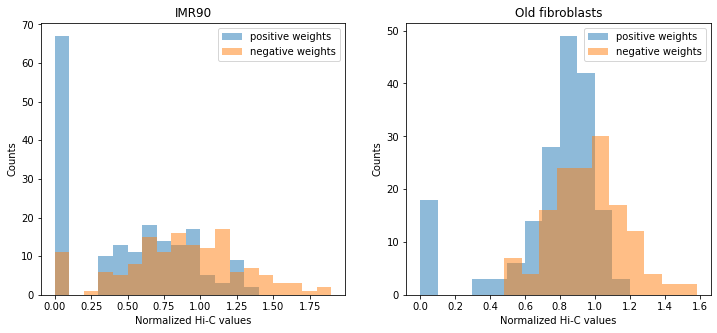

In [13]:
%matplotlib inline
binwidth = 0.1
percentage = 0.01
plot_hist(percentage, binwidth)
plt.savefig(save_dir+'histogram_top1.png')

## Top 5%

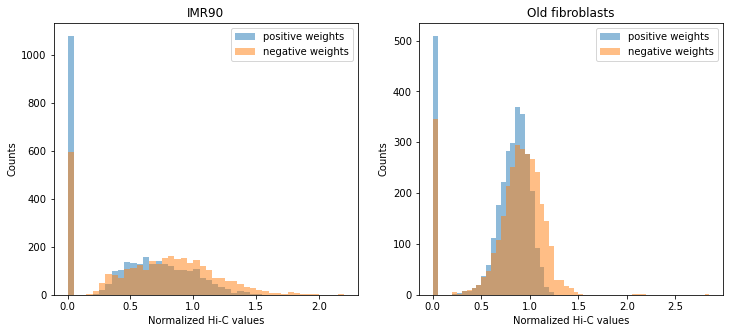

In [14]:
binwidth = 0.05
percentage = 0.05
plot_hist(percentage, binwidth)
plt.savefig(save_dir+'histogram_top5.png')

## Top 10%

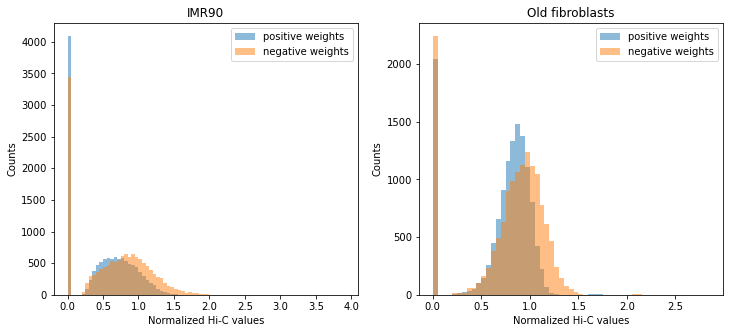

In [15]:
binwidth = 0.05
percentage = 0.1
plot_hist(percentage, binwidth)
plt.savefig(save_dir+'histogram_top10.png')

## Top 20%

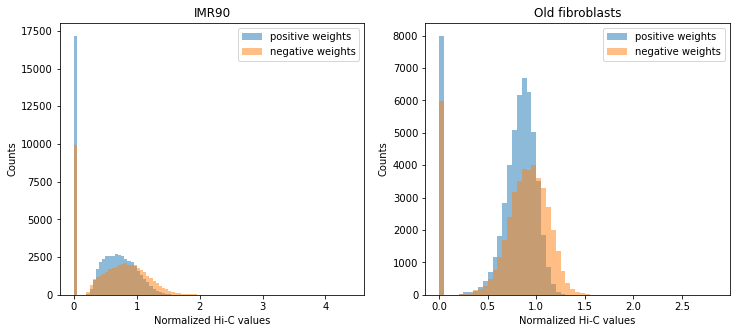

In [16]:
binwidth = 0.05
percentage = 0.2
plot_hist(percentage, binwidth)
plt.savefig(save_dir+'histogram_top20.png')

# Clustering positive and negative genes separately

In [39]:
# choose top 10% of the MEFISTO genes
percentage = 0.1
IMR90_pos_weights, IMR90_neg_weights, old_fibroblasts_pos_weights, old_fibroblasts_neg_weights = subset_data(percentage)

## IMR90

<Figure size 432x288 with 0 Axes>

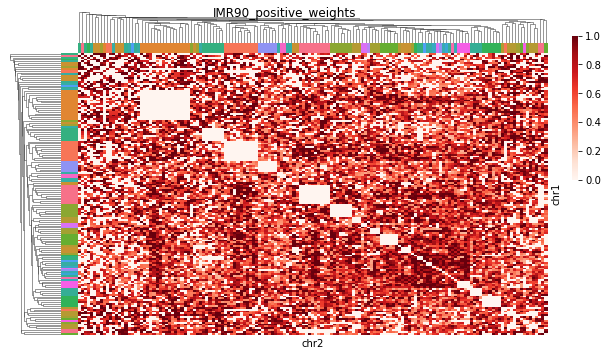

In [19]:
MEFISTO.plot_clusters_chrom(MEFISTO.long_to_wide(IMR90_pos_weights), "IMR90_positive_weights")
plt.savefig(save_dir+'clustering_IMR90_positive_top10.png')

<Figure size 432x288 with 0 Axes>

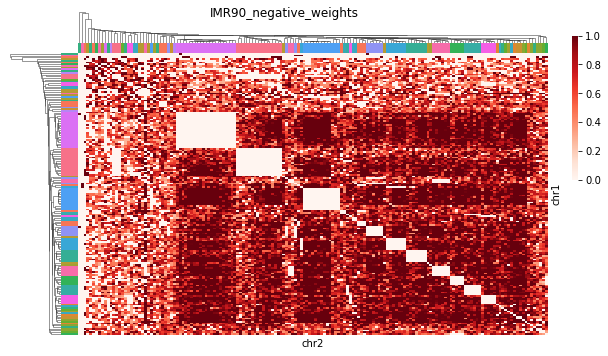

In [20]:
MEFISTO.plot_clusters_chrom(MEFISTO.long_to_wide(IMR90_neg_weights), "IMR90_negative_weights")
plt.savefig(save_dir+'clustering_IMR90_negative_top10.png')

## Old fibroblasts

<Figure size 432x288 with 0 Axes>

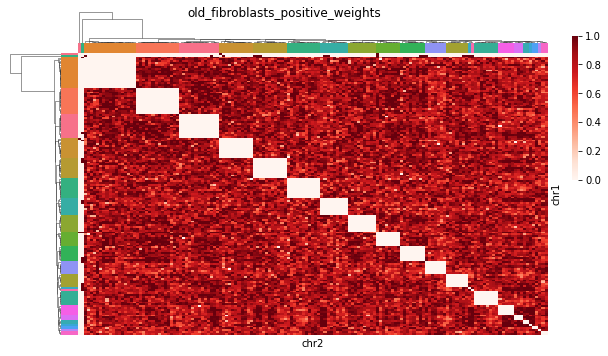

In [21]:
MEFISTO.plot_clusters_chrom(MEFISTO.long_to_wide(old_fibroblasts_pos_weights), "old_fibroblasts_positive_weights")
plt.savefig(save_dir+'clustering_old_fibroblasts_positive_top10.png')

<Figure size 432x288 with 0 Axes>

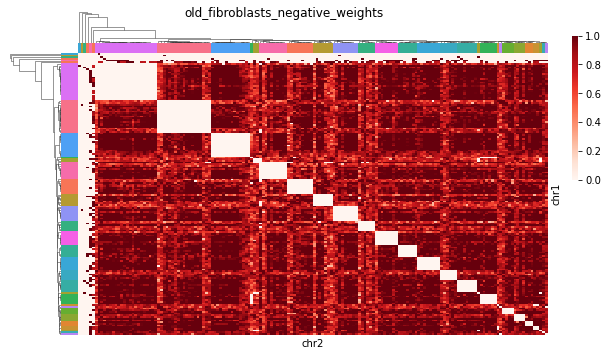

In [22]:
MEFISTO.plot_clusters_chrom(MEFISTO.long_to_wide(old_fibroblasts_neg_weights), "old_fibroblasts_negative_weights")
plt.savefig(save_dir+'clustering_old_fibroblasts_negative_top10.png')

## Clustering on all genes with most extreme weights

In [48]:
# get df with the top weighted genes from MEFISTO
pos_weights = pd.read_csv(data_dir+'MOFA/top_genes_pos_'+str(percentage)+'.csv')
pos_weights['sign'] = 'positive'
neg_weights = pd.read_csv(data_dir+'MOFA/top_genes_neg_'+str(percentage)+'.csv')
neg_weights['sign'] = 'negative'
selected_genes = pd.concat([pos_weights, neg_weights])

# filter Hi-C data to the MEFISTO loci
IMR90 = inter_IMR90[inter_IMR90['chr1'].isin(selected_genes['locus']) & 
                    inter_IMR90['chr2'].isin(selected_genes['locus'])]
old_fibroblasts = inter_old_fibroblasts[inter_old_fibroblasts['chr1'].isin(selected_genes['locus']) & 
                                        inter_old_fibroblasts['chr2'].isin(selected_genes['locus'])]

In [24]:
IMR90.head()

,chr1,chr2,value,value_norm
39923,chr_1_loc_750000,chr_2_loc_10000000,0.666505,0.451276
39924,chr_1_loc_1000000,chr_2_loc_10000000,1.453820,0.984351
39925,chr_1_loc_1250000,chr_2_loc_10000000,0.695180,0.470692
39926,chr_1_loc_1500000,chr_2_loc_10000000,1.710982,1.158470
39928,chr_1_loc_2000000,chr_2_loc_10000000,1.836094,1.243181


<Figure size 432x288 with 0 Axes>

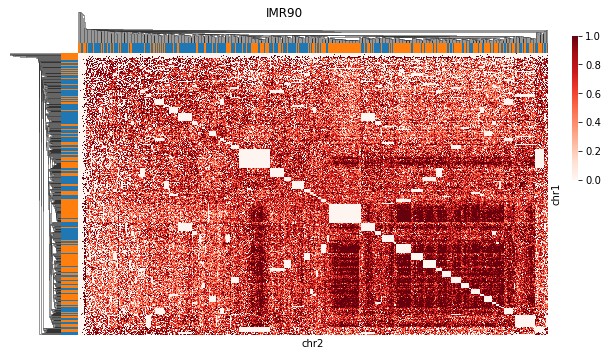

In [28]:
# coloring according to positive (blue) and negative (orange) weights
MEFISTO.plot_clusters_sign(MEFISTO.long_to_wide(IMR90), 'IMR90', selected_genes)

<Figure size 432x288 with 0 Axes>

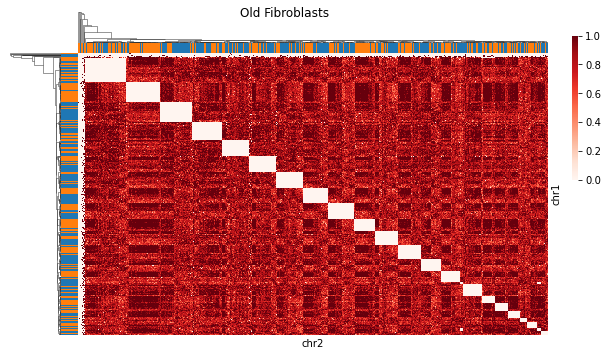

In [30]:
MEFISTO.plot_clusters_sign(MEFISTO.long_to_wide(old_fibroblasts), 'Old Fibroblasts', selected_genes)

In [53]:
IMR90

,chr1,chr2,value,value_norm
39923,chr_1_loc_750000,chr_2_loc_10000000,0.666505,0.589232
39924,chr_1_loc_1000000,chr_2_loc_10000000,1.453820,1.000000
39925,chr_1_loc_1250000,chr_2_loc_10000000,0.695180,0.614583
39926,chr_1_loc_1500000,chr_2_loc_10000000,1.710982,1.000000
39928,chr_1_loc_2000000,chr_2_loc_10000000,1.836094,1.000000
...,...,...,...,...
62946631,chr_21_loc_26750000,chr_22_loc_41750000,0.306574,0.271030
62950100,chr_21_loc_25500000,chr_22_loc_46250000,0.492990,0.435834
62950105,chr_21_loc_26750000,chr_22_loc_46250000,0.945918,0.836251
62953381,chr_21_loc_25500000,chr_22_loc_50500000,1.345782,1.000000


In [52]:
IMR90['value_norm'][IMR90['value_norm'] > 1] = 1

/tmp/ipykernel_13561/2518365123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMR90['value_norm'][IMR90['value_norm'] > 1] = 1
/tmp/ipykernel_13561/2518365123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMR90['value_norm'][IMR90['value_norm'] > 1] = 1
